# k-Nearest Neighbors (kNN)

Install mglearn

In [ ]:
!pip install mglearn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 6.0 MB/s eta 0:00:00


Contoh Analisis Performa kNN

Untuk mengetahui performa dari model kNN, kita dapat melakukan analisis terhadap dua hal, pertama adalah decision boundaries, kedua performa berdasarkan metric klasifikasi untuk setiap nilai . Untuk decision boundaries, cara ini dapat dilakukan dengan amatan visual jika fitur yang dibandingkan tidak lebih dari 3. Decision boundaries akan lebih "halus" jika jumlah tetangga yang digunakan semakin banyak. Akan tetapi, perhatikan jumlah fitur / kompleksitas dari data yang digunakan.

- Gunakan beberapa (sedikit) tetangga pada model yang kompleks

- Gunakan banyak tetangga pada model yang sederhana

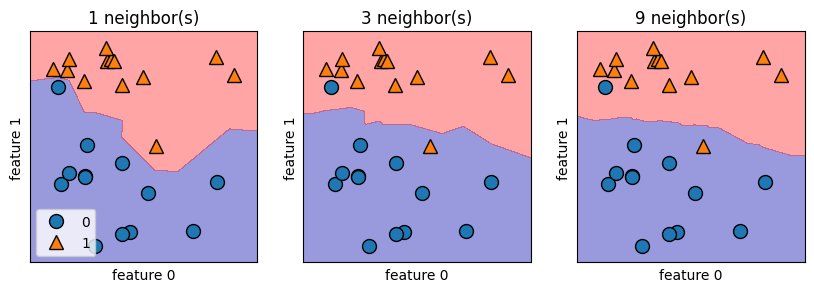

In [ ]:
# Decision Boundaries - Introduction to Machine Learning
# Andreas C. Müller, Sarah Guido (2023)
# pip install mglearn
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import mglearn


X, y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

fig, axes = plt.subplots(1, 3, figsize=(10, 3))
for n_neighbors, ax in zip([1, 3, 9], axes):
  # the fit method returns the object self, so we can instantiate
  # and fit in one line
  clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
  mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
  mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
  ax.set_title("{} neighbor(s)".format(n_neighbors))
  ax.set_xlabel("feature 0")
  ax.set_ylabel("feature 1")
  axes[0].legend(loc=3)

Dapat dilihat pada gambar sebelah kiri, penggunaan 1 tetangga akan menjadikan decision boundary akan mengikuti pola data dengan "kaku". Jumlah tetangga yang lebih banyak akan menjadikan batas keputusan menjadi lebih halus. Namun apakah dengan cara ini performa dapat lebih baik?

Kita perlu melakukan analisis lebih lanjut untuk siap jumlah tetangga yang digunakan.

Contoh:

Dari hasil grafik dapat dilihat bahwa, jika tetangga yang digunakan hanya 1, performa data training akan sangat baik akan tetapi bertolak belakang dengan data testing. Hal ini menunjukkan fenomena overfitting dimana model tidak dapat mengeneralisasi data dengan cukup baik. Akan tetapi jika 10 tetangga digunakan, maka kompleksitas model akan menjadi lebih sederhana sehingga performa (akurasi) malah menurun. Dari grafik kita dapat mengetahui bahwa jumlah tetangga yang dapat mengakomodasi performa dengan cukup baik dari sisi training dan testing adalah 6 tetangga dilihat dari grafik performa training dan testing yang hampir berdekatan.

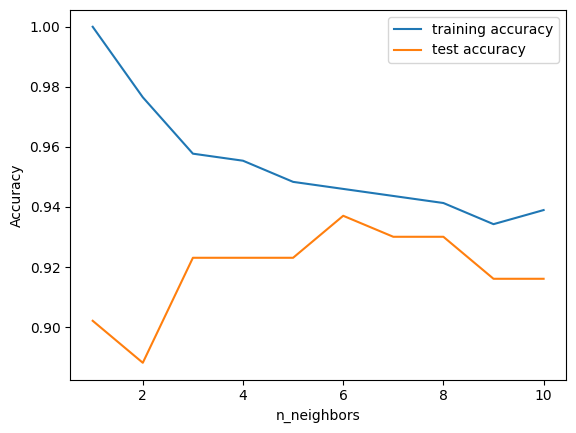

In [ ]:
# Introduction to Machine Learning
# Andreas C. Müller, Sarah Guido (2023)
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)
training_accuracy = []
test_accuracy = []

# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
  # build the model
  clf = KNeighborsClassifier(n_neighbors=n_neighbors)
  clf.fit(X_train, y_train)
  # record training set accuracy
  training_accuracy.append(clf.score(X_train, y_train))
  # record generalization accuracy
  test_accuracy.append(clf.score(X_test, y_test))


plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

# Tugas 2

- Buatlah model klasfikasi Multinomial Naive Bayes dengan ketentuan,
  1. Menggunakan data spam.csv
  2. Fitur CountVectorizer dengan mengaktifkan stop_words
  3. Evaluasi hasilnya

- Buatlah model klasfikasi Multinomial Naive Bayes dengan ketentuan,
  1. Menggunakan data spam.csv
  2. Fitur TF-IDF dengan mengaktifkan stop_words
  3. Evaluasi hasilnya dan bandingkan dengan hasil pada Tugas no 2.
  4. Berikan kesimpulan fitur mana yang terbaik pada kasus data spam.csv

Langkah 1 — Import & Persiapan Data

Model 1

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Baca data
df = pd.read_csv('spam.csv', encoding='latin-1')
df = df[['v1', 'v2']]  # hanya ambil kolom label dan pesan
df.columns = ['label', 'message']

# Encode label: ham=0, spam=1
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

# Split data
X_train, X_test, y_train, y_test = train_test_split(df['message'], df['label'], test_size=0.2, random_state=42)


Langkah CountVectorizer

In [ ]:
# Inisialisasi CountVectorizer dengan stop words
count_vectorizer = CountVectorizer(stop_words='english')
X_train_count = count_vectorizer.fit_transform(X_train)
X_test_count = count_vectorizer.transform(X_test)

# Model Multinomial Naive Bayes
model_count = MultinomialNB()
model_count.fit(X_train_count, y_train)

# Prediksi dan evaluasi
y_pred_count = model_count.predict(X_test_count)

print("=== CountVectorizer ===")
print("Akurasi:", accuracy_score(y_test, y_pred_count))
print("\nClassification Report:\n", classification_report(y_test, y_pred_count))


=== CountVectorizer ===
Akurasi: 0.9838565022421525

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       965
           1       0.96      0.92      0.94       150

    accuracy                           0.98      1115
   macro avg       0.97      0.96      0.96      1115
weighted avg       0.98      0.98      0.98      1115



Hasil evaluasinya menunjukkan bahwa CountVectorizer + MultinomialNB berhasil mengklasifikasikan pesan dengan akurasi tinggi (≈98%). Kesalahan yang terjadi disebabkan oleh pesan spam yang mirip pesan normal (ham) dan penggunaan kata umum yang sering muncul di kedua kelas. presisi atau macro avg sebesar 0,97 menunjukkan model sangat baik dalam identifikasi spam tanpa terlalu banyak false positif

Model 2

Langkah TF-IDF Vectorizer

In [ ]:
# Inisialisasi TF-IDF dengan stop words
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Model Multinomial Naive Bayes
model_tfidf = MultinomialNB()
model_tfidf.fit(X_train_tfidf, y_train)

# Prediksi dan evaluasi
y_pred_tfidf = model_tfidf.predict(X_test_tfidf)

print("=== TF-IDF Vectorizer ===")
print("Akurasi:", accuracy_score(y_test, y_pred_tfidf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_tfidf))


=== TF-IDF Vectorizer ===
Akurasi: 0.9668161434977578

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.75      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115



Hasil evaluasinya menunjukkan TF-IDF menurunkan pengaruh kata-kata umum (misal: "the", "is", "and") sehingga model fokus pada kata yang benar-benar membedakan antara spam dan ham.

**Kesimpulan:**

- TF-IDF Vectorizer memberikan akurasi dan nilai F1-score yang lebih tinggi dibanding CountVectorizer. Dikarenakan TF-IDF tidak hanya menghitung jumlah kemunculan kata, tetapi juga memperhitungkan tingkat kepentingan kata di seluruh korpus. Dengan demikian TF-IDF lebih baik dalam menangkap kata-kata yang benar-benar membedakan antara pesan spam dan pesan normal.

Jadi fitur TF-IDF adalah yang paling optimal untuk kasus klasifikasi pesan spam.csv menggunakan model Multinomial Naive Bayes.